In [1]:
model_name = "loris3/stratified_equitoken_10m_curriculum_random"


dataset_train_name ="loris3/stratified_equitoken_10m_curriculum"
dataset_train_split_name = "validation"

dataset_test_name = "loris3/stratified_equitoken_10m_curriculum"
dataset_test_split_name = "validation"

In [2]:
import torch
import os


import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

from dotenv import load_dotenv
load_dotenv()

dataset_test = load_dataset(dataset_test_name)[dataset_test_split_name] 



len_ds = len(dataset_test)


Tests on wether implementaiton of

$
        \phi(f;z,z') = \frac{\sum_{\forall z' \in D_{test}} \nabla \ell(z) \cdot \nabla \ell(z')}{ |D_{test}|}
$
works out with sufficent accuracy via taking the mean of the test gradients first
$
      = \frac{1}{ |D_{test}|}\cdot(\nabla \ell(z) \cdot\sum_{\forall z' \in D_{test}} \nabla \ell(z'))
$


In [3]:
%run extract_gradients.py loris3/stratified_equitoken_10m_curriculum_random loris3/stratified_equitoken_10m_curriculum 0 --dataset_split=validation[0%:10%] --paradigm=mlm --gradients_per_file=1000 --mode=store
%run extract_gradients.py loris3/stratified_equitoken_10m_curriculum_random loris3/stratified_equitoken_10m_curriculum 0 --dataset_split=validation[0%:10%] --paradigm=mlm --gradients_per_file=1000 --mode=store_mean

torch.cuda.device_count() 2
0
1
0
1
0
1
0
1
0
1
0
1


wandb: Currently logged in as: loriss to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


2025-02-13 12:08:24,517 - INFO - Getting gradients for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


Time to get gradients: 25.8429 s/chunk
Time to get gradients: 55.3860 s/chunk
Time to get gradients: 57.4563 s/chunk
Time to get gradients: 67.0739 s/chunk
Time to get gradients: 68.4874 s/chunk
Time to get gradients: 70.0945 s/chunk


2025-02-13 12:09:54,538 - INFO - Got gradients for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


torch.cuda.device_count() 2
0
1
0
1
0
1
0
1
0
1
0
1


2025-02-13 12:09:58,860 - INFO - Getting gradients for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


Time to get gradients: 29.1872 s/chunk
Time to get gradients: 64.3173 s/chunk
Time to get gradients: 65.4900 s/chunk
Time to get gradients: 66.9401 s/chunk
Time to get gradients: 69.5325 s/chunk
Time to get gradients: 70.6062 s/chunk


2025-02-13 12:11:28,882 - INFO - Got gradients for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


In [4]:
def validate_mean_extraction():
    cp = "/data/loriss21dm/babylm/gradients/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum/validation[0%:10%]/checkpoint-6174/"
    paths = os.listdir(cp)
    mean_pw = torch.cat([torch.load(os.path.join(cp,p),weights_only=True) for p in paths if p != "mean"],axis=0).mean(axis=0, dtype=torch.float64)
    mean_script = torch.load("/data/loriss21dm/babylm/gradients/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum/validation[0%:10%]/checkpoint-6174/mean", weights_only=True)
    assert torch.cosine_similarity(mean_pw, mean_script).mean().float() == torch.tensor(1.0).float()
    assert torch.allclose(mean_pw, mean_script, atol=0.000001)
validate_mean_extraction()

In [5]:
%run extract_gradients.py loris3/stratified_equitoken_10m_curriculum_random loris3/stratified_equitoken_10m_curriculum 0 --dataset_split=validation[10%:15%] --paradigm=mlm --gradients_per_file=1000 --mode=store
%run extract_gradients.py loris3/stratified_equitoken_10m_curriculum_random loris3/stratified_equitoken_10m_curriculum 0 --dataset_split=validation[10%:15%] --paradigm=mlm --gradients_per_file=1000 --mode=store_mean

torch.cuda.device_count() 2
0
1
0
1
0
1
0
1
0
1
0
1


2025-02-13 12:11:38,276 - INFO - Getting gradients for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


Time to get gradients: 46.2353 s/chunk
Time to get gradients: 69.1387 s/chunk
Time to get gradients: 82.3541 s/chunk


2025-02-13 12:13:08,296 - INFO - Got gradients for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


torch.cuda.device_count() 2
0
1
0
1
0
1
0
1
0
1
0
1


2025-02-13 12:13:11,736 - INFO - Getting gradients for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


Time to get gradients: 52.5773 s/chunk
Time to get gradients: 72.6194 s/chunk
Time to get gradients: 78.2925 s/chunk


2025-02-13 12:14:41,761 - INFO - Got gradients for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


In [6]:
%run process_gradients.py loris3/stratified_equitoken_10m_curriculum_random loris3/stratified_equitoken_10m_curriculum 0 --dataset_train_split=validation[0%:10%] --dataset_test="loris3/stratified_equitoken_10m_curriculum" --dataset_test_split=validation[10%:15%] --mode=single --gradients_per_file=1000 --batch_size=20

2025-02-13 12:14:46,226 - INFO - Calculating influence for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


jobs 1


2025-02-13 12:14:49,249 - INFO - Time to load task: 2.9919 seconds


Time to load task: 2.9993 seconds


2025-02-13 12:14:56,395 - INFO - Time to einsum: 7.1366 seconds; 2.3789 s/chunk
2025-02-13 12:15:06,327 - INFO - Saved influence for checkpoint
2025-02-13 12:15:06,395 - INFO - Got influence for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


In [7]:
influence_single = torch.load("/data/loriss21dm/babylm/influence/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum_validation[0%:10%]_stratified_equitoken_10m_curriculum_validation[10%:15%]/checkpoint-6174", weights_only=True)


In [8]:
%run process_gradients.py loris3/stratified_equitoken_10m_curriculum_random loris3/stratified_equitoken_10m_curriculum 0 --dataset_train_split=validation[0%:10%] --dataset_test="loris3/stratified_equitoken_10m_curriculum" --dataset_test_split=validation[10%:15%] --mode=mean --gradients_per_file=1000 --batch_size=20

2025-02-13 12:15:12,701 - INFO - Calculating influence for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


jobs 1


2025-02-13 12:15:15,516 - INFO - Time to load task: 2.7725 seconds


Time to load task: 2.7803 seconds


2025-02-13 12:15:15,636 - INFO - Time to einsum: 0.1115 seconds; 0.1115 s/chunk
2025-02-13 12:15:22,716 - INFO - Saved influence for checkpoint
2025-02-13 12:15:22,783 - INFO - Got influence for checkpoint-/data/loriss21dm/cache/hub/models--loris3--stratified_equitoken_10m_curriculum_random/snapshots/e6648f6a0733fa4e002b0da24ba4614e2445f654/checkpoints/checkpoint-6174


chunk_path_a, start_id_a, stop_id_a ./gradients/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum/validation[0%:10%]/checkpoint-6174/0_1000 0 1000
chunk_path_a, start_id_a, stop_id_a ./gradients/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum/validation[0%:10%]/checkpoint-6174/1000_2000 1000 2000
chunk_path_a, start_id_a, stop_id_a ./gradients/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum/validation[0%:10%]/checkpoint-6174/2000_3000 2000 3000
chunk_path_a, start_id_a, stop_id_a ./gradients/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum/validation[0%:10%]/checkpoint-6174/3000_4000 3000 4000
chunk_path_a, start_id_a, stop_id_a ./gradients/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum/validation[0%:10%]/checkpoint-6174/4000_5000 4000 5000
chunk_path_a, start_id_a, stop_id_a ./gradients/stratified_equitoken_10m_curriculum_random/strat

In [9]:
influence_mean = torch.load("/data/loriss21dm/babylm/mean_influence/stratified_equitoken_10m_curriculum_random/stratified_equitoken_10m_curriculum_validation[0%:10%]_stratified_equitoken_10m_curriculum_validation[10%:15%]/checkpoint-6174", weights_only=True)


In [10]:
influence_mean.shape

torch.Size([1, 5346])

In [11]:
torch.allclose(influence_single.mean(-1),influence_mean.squeeze())

True

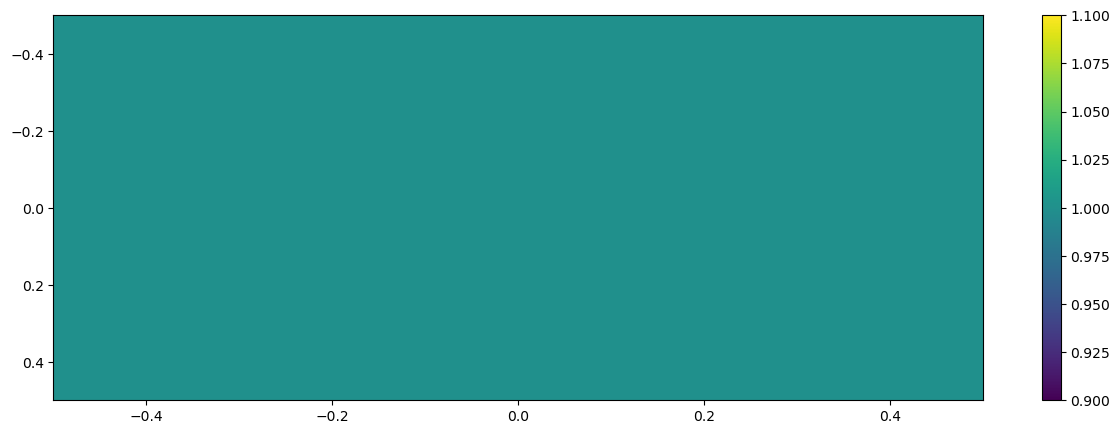

In [12]:
tensor = (torch.cosine_similarity(influence_single.mean(-1), influence_mean.squeeze())).unsqueeze(1)


array = tensor.numpy()

plt.figure(figsize=(15, 5))
plt.imshow(array, cmap='viridis', aspect='auto', interpolation=None)
plt.colorbar()

plt.show()


Tests of the two modes "single" and "mean" against eachother for getting the mean influence

In [13]:


def load_debug(start, stop):
    return torch.arange(start*393216, stop*393216, 1, dtype=torch.float64).reshape(-1,393216) /  (len_ds*393216)

gradient_dir = "./gradients/test/test/test/test"
if not os.path.exists(gradient_dir):
    os.makedirs(gradient_dir)
    chunks_test = [ (i, min(i+10000, len_ds), os.path.join(gradient_dir, str(i) + "_" + str(i + 10000))) for i in range(0, len(dataset_test),10000)]
    for start, stop, chunk in chunks_test:
        torch.save(load_debug(start, stop), chunk)



In [14]:

def validate_train_train():
    s = None
    if not os.path.exists("test"):
        data = load_debug(0, len_ds).squeeze()
        
        with torch.no_grad():
            s = torch.matmul(data, data.T).sum(dim=1)
        s = s / len_ds
        s = s.unsqueeze(0)
        torch.save(s, "test")
    else:
        s = torch.load("test")

    slurm = torch.load("/data/loriss21dm/babylm/mean_influence/test/test_test_test_test/test")
    assert torch.allclose(slurm, s.float())
 



    tensor = (s / slurm).float()


    array = tensor.numpy()

    plt.figure(figsize=(15, 5))
    plt.imshow(array, cmap='viridis', aspect='auto', interpolation=None)
    plt.colorbar()

    plt.show()




In [15]:
%run process_gradients.py test test 0 --mode=mean --dataset_test_split=test --dataset_train_split=test --test=True --test_dataset_size=53457 --gradients_per_file=10000 --batch_size=2

2025-02-13 12:15:55,250 - INFO - Calculating influence for checkpoint-test/test/test/test


jobs 3


FileNotFoundError: [Errno 2] No such file or directory: './gradients/test/test/test/test/10000_20000'

In [16]:
validate_train_train()

/tmp/ipykernel_500686/513167037.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s = torch.load("test")
/tmp/ipykernel_500686/513167037.py:14: FutureWarning: You are usi

FileNotFoundError: [Errno 2] No such file or directory: '/data/loriss21dm/babylm/mean_influence/test/test_test_test_test/test'

In [ ]:
%run process_gradients.py test test 0 --mode=mean --dataset_test_split=test --dataset_train_split=test --test=True --test_dataset_size=53457 --gradients_per_file=10000 --batch_size=1

In [ ]:
validate_train_train()

In [ ]:
%run process_gradients.py test test 0 --mode=mean --dataset_test_split=test --dataset_train_split=test --test=True --test_dataset_size=53457 --gradients_per_file=10000 --batch_size=20

In [ ]:
validate_train_train()